In [2]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
import optuna
import xgboost as xgb
import lightgbm as lgb
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

/Users/yuravbeo/anaconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/yuravbeo/anaconda3/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
train_df = pd.read_csv('csv_files/train.csv')
test_df = pd.read_csv('csv_files/test.csv')

train_df_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



## Check Missing Values

In [10]:
table = PrettyTable()

table.field_names = ['Column Name', 'Data Type', '# Null Values']
for column in train_df.columns:
    data_type = str(train_df[column].dtype)
    non_null_count = train_df[column].isnull().sum()
    table.add_row([column, data_type, non_null_count])
print(table)


+--------------+-----------+---------------+
| Column Name  | Data Type | # Null Values |
+--------------+-----------+---------------+
| PassengerId  |   object  |       0       |
|  HomePlanet  |   object  |      201      |
|  CryoSleep   |   object  |      217      |
|    Cabin     |   object  |      199      |
| Destination  |   object  |      182      |
|     Age      |  float64  |      179      |
|     VIP      |   object  |      203      |
| RoomService  |  float64  |      181      |
|  FoodCourt   |  float64  |      183      |
| ShoppingMall |  float64  |      208      |
|     Spa      |  float64  |      183      |
|    VRDeck    |  float64  |      188      |
|     Name     |   object  |      200      |
| Transported  |    bool   |       0       |
+--------------+-----------+---------------+


## Where are the missing values

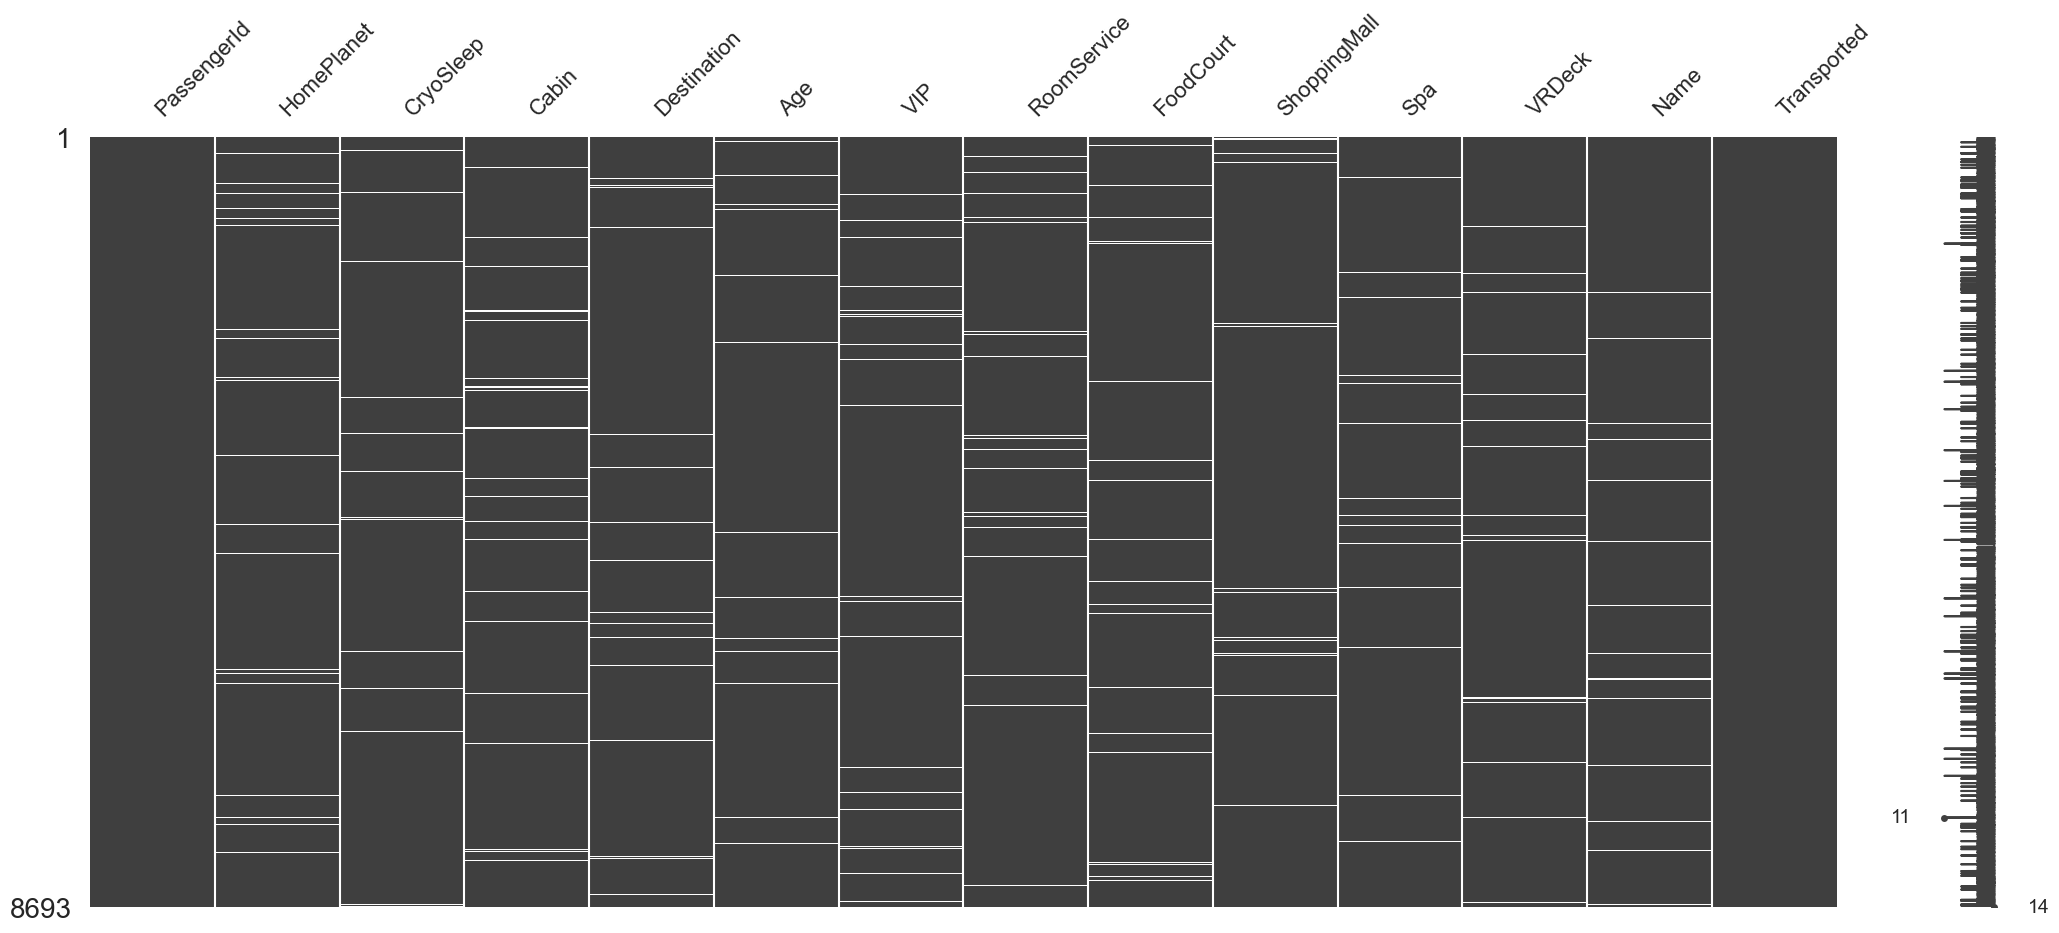

In [12]:
msno.matrix(train_df)
plt.show()

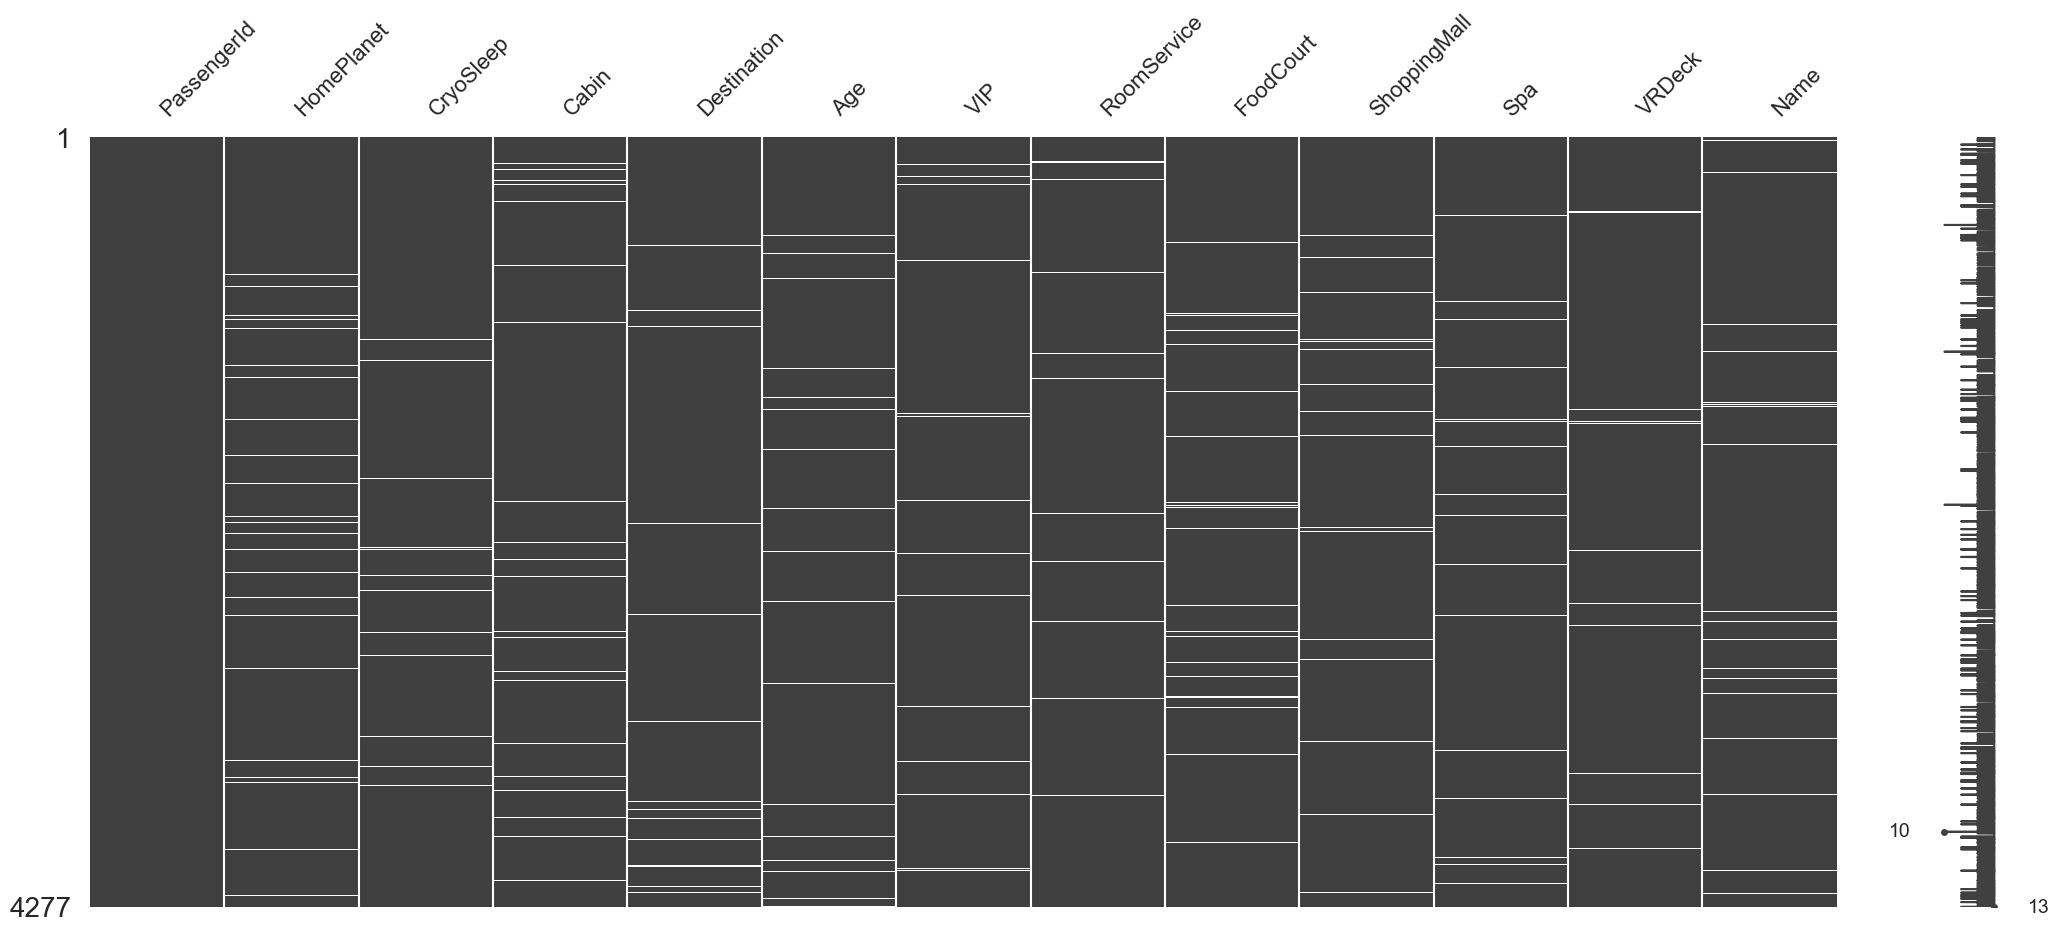

In [13]:
msno.matrix(test_df)
plt.show()

# Exploritary Data Analysis

## Target Analysis

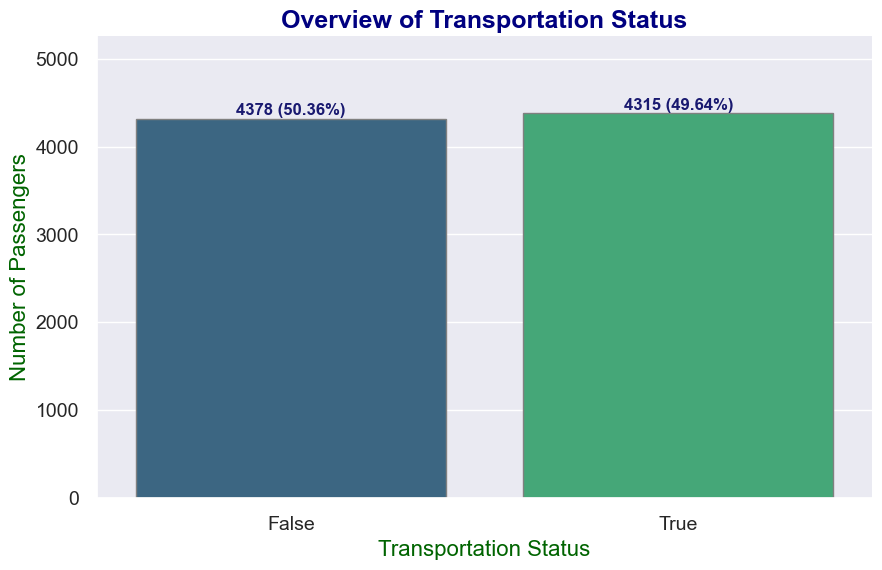

In [27]:
# Compute class proportions
transported_counts = train_df['Transported'].value_counts()
total_entries = train_df.shape[0]
proportions = (transported_counts / total_entries)

# Generate annotations for each bar
annotations = [f'{count} ({prop:.2%})' for count, prop in zip(transported_counts, proportions)]

# Choose a vibrant color palette
color_scheme = sns.color_palette('viridis', n_colors=len(transported_counts))

# Initialize the plot
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='Transported', data=train_df, palette=color_scheme, edgecolor='gray')

# Customizing the plot with a title and axis labels
plt.title('Overview of Transportation Status', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Transportation Status', fontsize=16, color='darkgreen')
plt.ylabel('Number of Passengers', fontsize=16, color='darkgreen')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=14)

# Setting custom ylim for annotation space
plt.ylim(0, max(transported_counts) * 1.2)

# Annotate bars with class count and proportion information
for idx, patch in enumerate(bar_plot.patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2., height + 5, annotations[idx],
             ha='center', va='bottom', fontsize=12, color='midnightblue', fontweight='bold')

# Remove top and right spines
sns.despine()

# Display the plot
plt.show()


The data is balanced so accuracy will be a good metric to choose while building models

## Train & Test Data Distributions

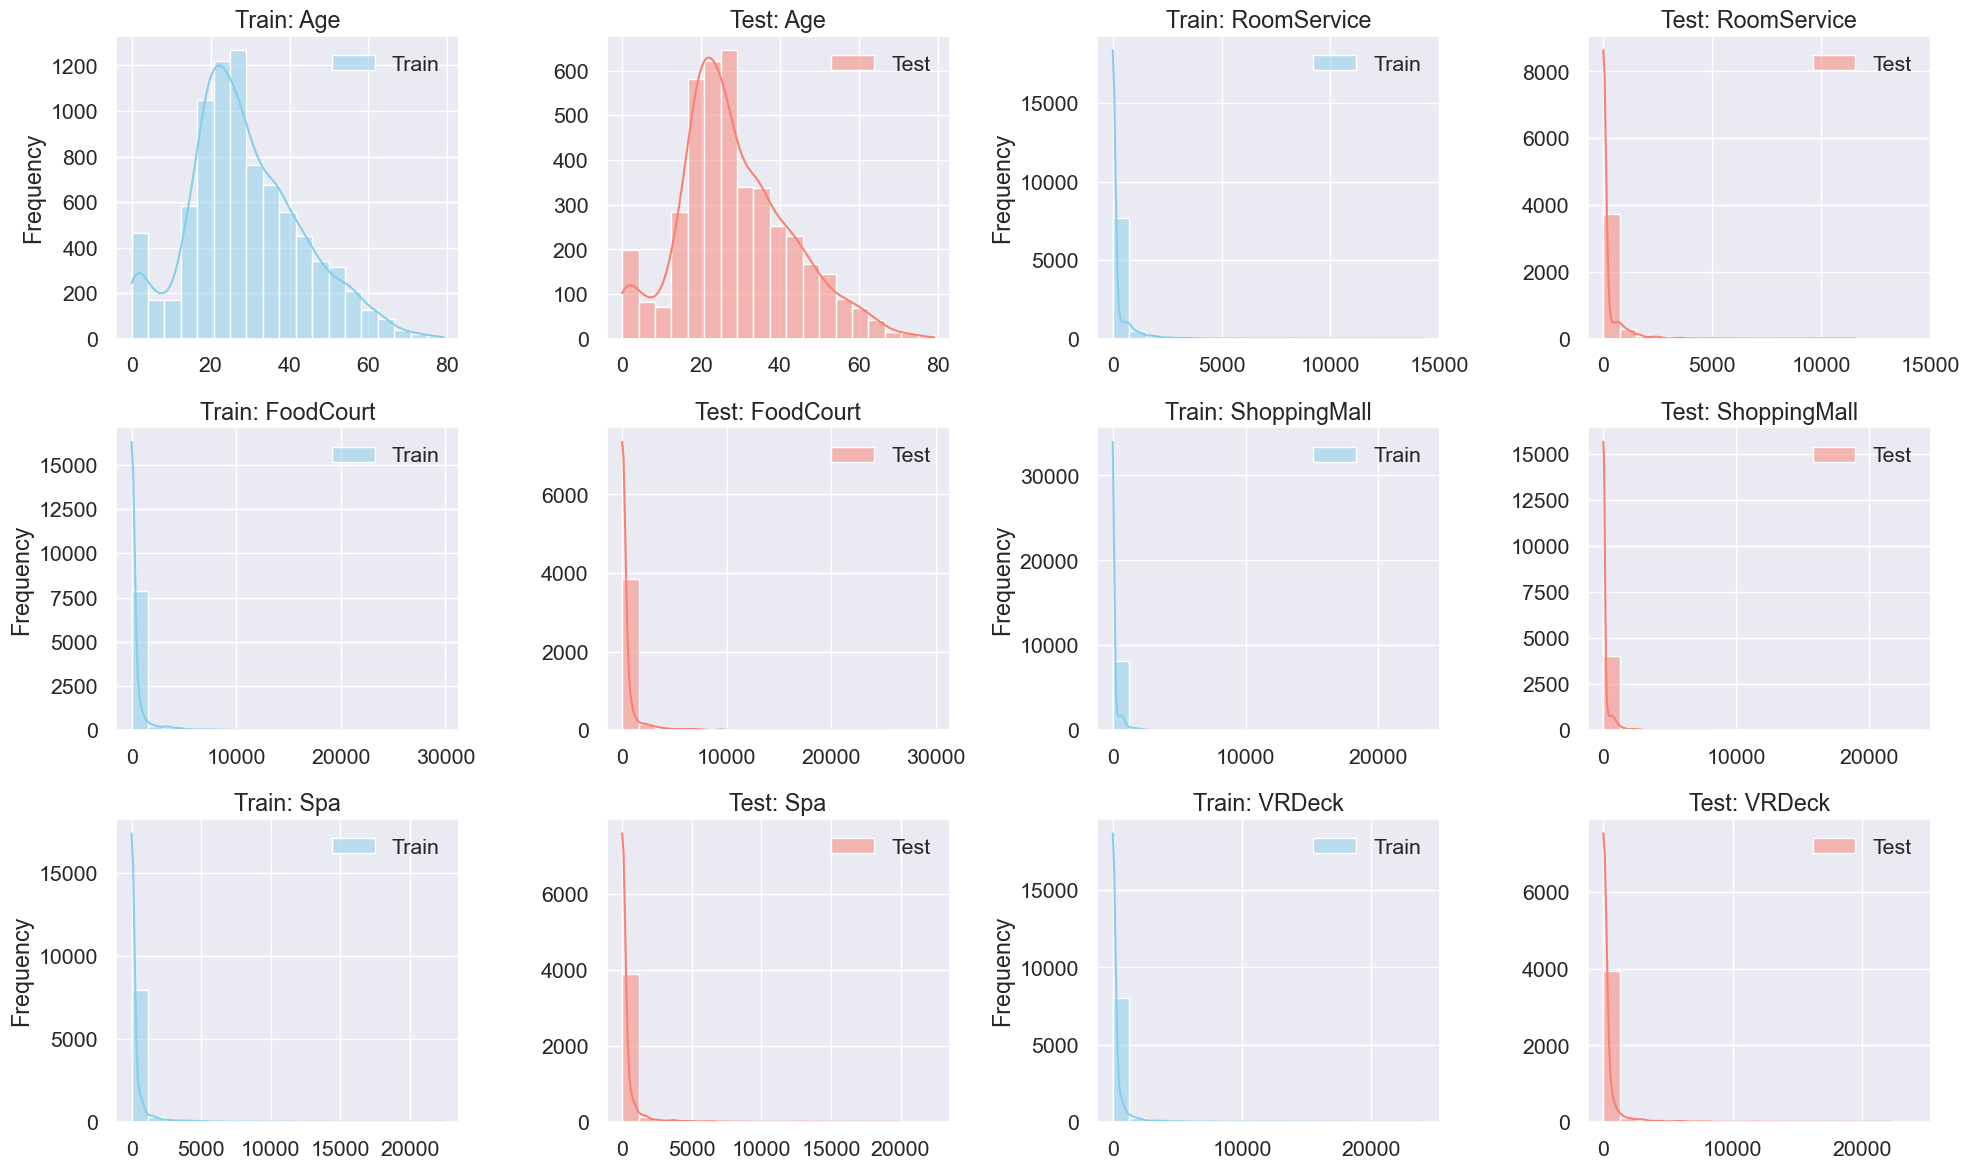

In [36]:
cont_cols=[f for f in train_df.columns if train_df[f].dtype in [float,int] and train_df[f].nunique()>3]

# Create a single row of subplots, with two plots for each continuous column (one for train and one for test)
fig, axs = plt.subplots(3, 4, figsize=(20, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Iterate through the continuous columns and their corresponding axes
for i, col in enumerate(cont_cols):
    # Compute shared range and bin settings for both train and test histograms
    combined_max = np.max([train_df[col].max(), test_df[col].max()])
    combined_min = np.min([train_df[col].min(), test_df[col].min()])
    bins = np.linspace(combined_min, combined_max, 20)

    # Plot histogram for the training dataset on the left
    sns.histplot(train_df[col], ax=axs[i * 2], bins=bins, color='skyblue', kde=True, label='Train')
    axs[i * 2].set_title(f'Train: {col}')
    axs[i * 2].set_xlabel('')
    axs[i * 2].set_ylabel('Frequency')
    axs[i * 2].legend()

    # Plot histogram for the testing dataset on the right
    sns.histplot(test_df[col], ax=axs[i * 2 + 1], bins=bins, color='salmon', kde=True, label='Test')
    axs[i * 2 + 1].set_title(f'Test: {col}')
    axs[i * 2 + 1].set_xlabel('')
    axs[i * 2 + 1].set_ylabel('')
    axs[i * 2 + 1].legend()

# If the number of plots is not a multiple of the grid size, hide the unused axes
for j in range(i * 2 + 2, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

## Train Data Distributions across Classes

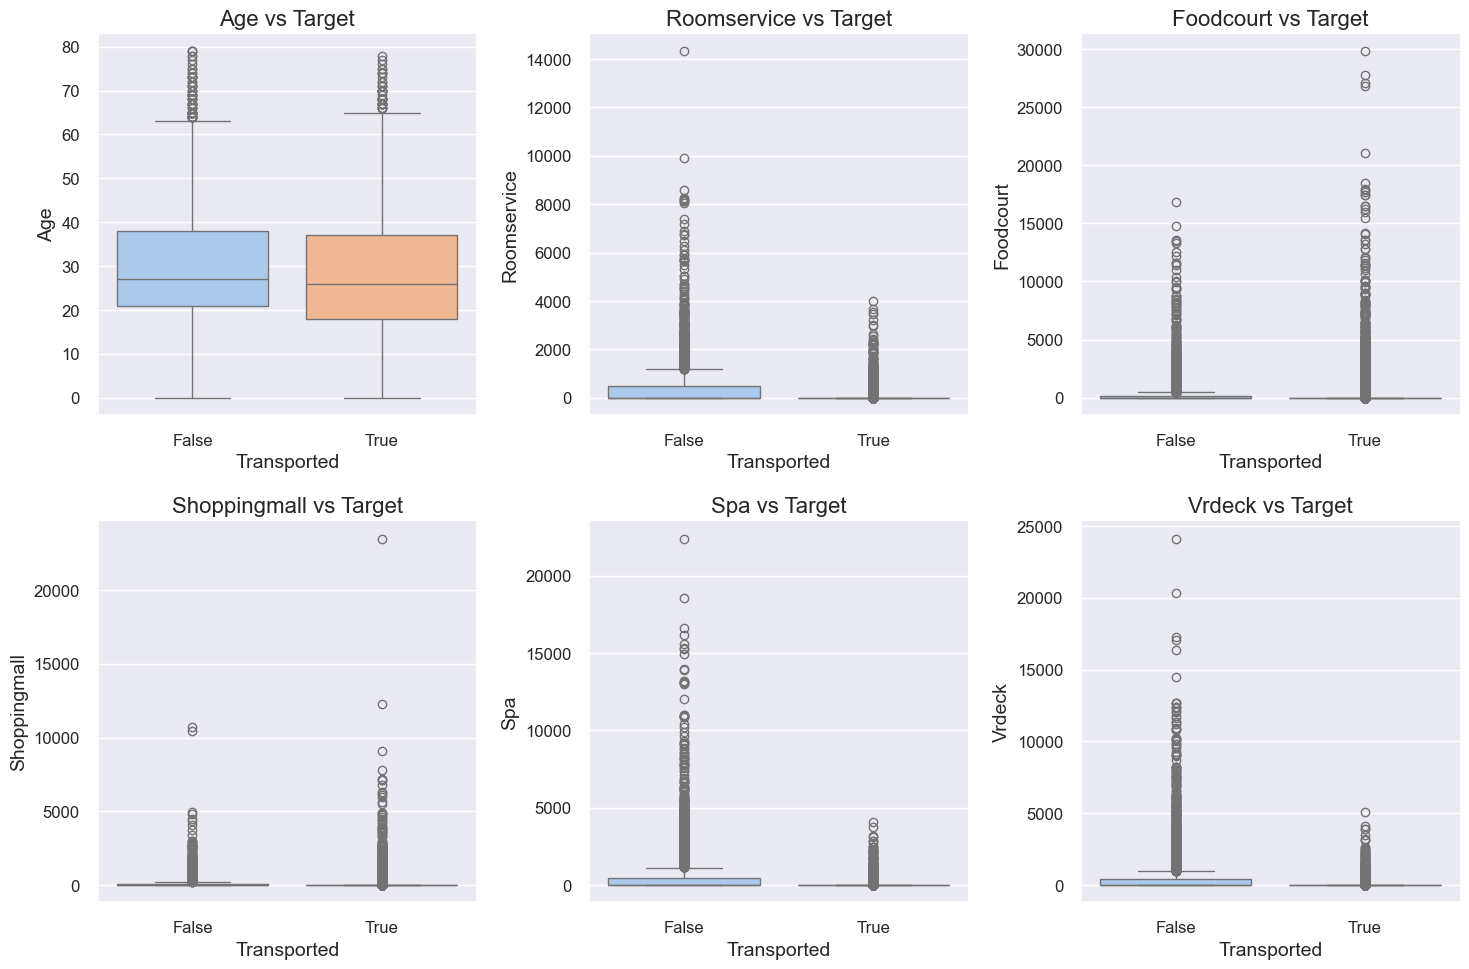

In [39]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over them

# Iterate through each continuous column and plot boxplots
for i, col in enumerate(cont_cols[:6]):
    sns.boxplot(x='Transported', y=col, data=train_df, ax=axs[i], palette='pastel')
    axs[i].set_title(f'{col.title()} vs Target', fontsize=16)
    axs[i].set_xlabel('Transported', fontsize=14)
    axs[i].set_ylabel(col.title(), fontsize=14)
    axs[i].tick_params(axis='both', labelsize=12)
    sns.despine()

# If there are fewer than 6 continuous columns, hide the unused subplots
for j in range(i + 1, 6):
    axs[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()